## Exercise 3

Do an exploratory data analysis of the adult dataset. The cell below loads the dataset from UCI Machine Learning Repository into a pandas dataframe called `adult_data`. It requires that you have installed the package `ucimlrepo`. (Otherwise the dataset is on model for this class.)

The hand-in exercise for this topic is Exercise 3 from the notebook “Exercises in DT and
EDA.ipynb”. The exercise asks you to do an exploratory data analysis of the adult dataset.
There is no change in the exercise and what is required, however, here is an elaboration of
what the exercise involves: You need to explain what the data is about, which variables the
dataset contains and what their data type is. Moreover, for each individual variable you
should investigate/explain its distribution/variation through visualization and descriptive
statistics. Finally, you should investigate/explain the variation/correlation between pairs of
variables – here it is enough to investigate three pairs of variables, one where both
variables are categorical, one where both variables are numeric, and one where one of the
variable is categorical and the other is numeric.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

from ucimlrepo import fetch_ucirepo 

sns.set_theme(rc={'figure.figsize':(20,8)})

In [2]:
adult = fetch_ucirepo(id=2) 
X = adult.data.features 
y = adult.data.targets 
X["income"] = y
adult_data = X.copy()

adult_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [3]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
adult_data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


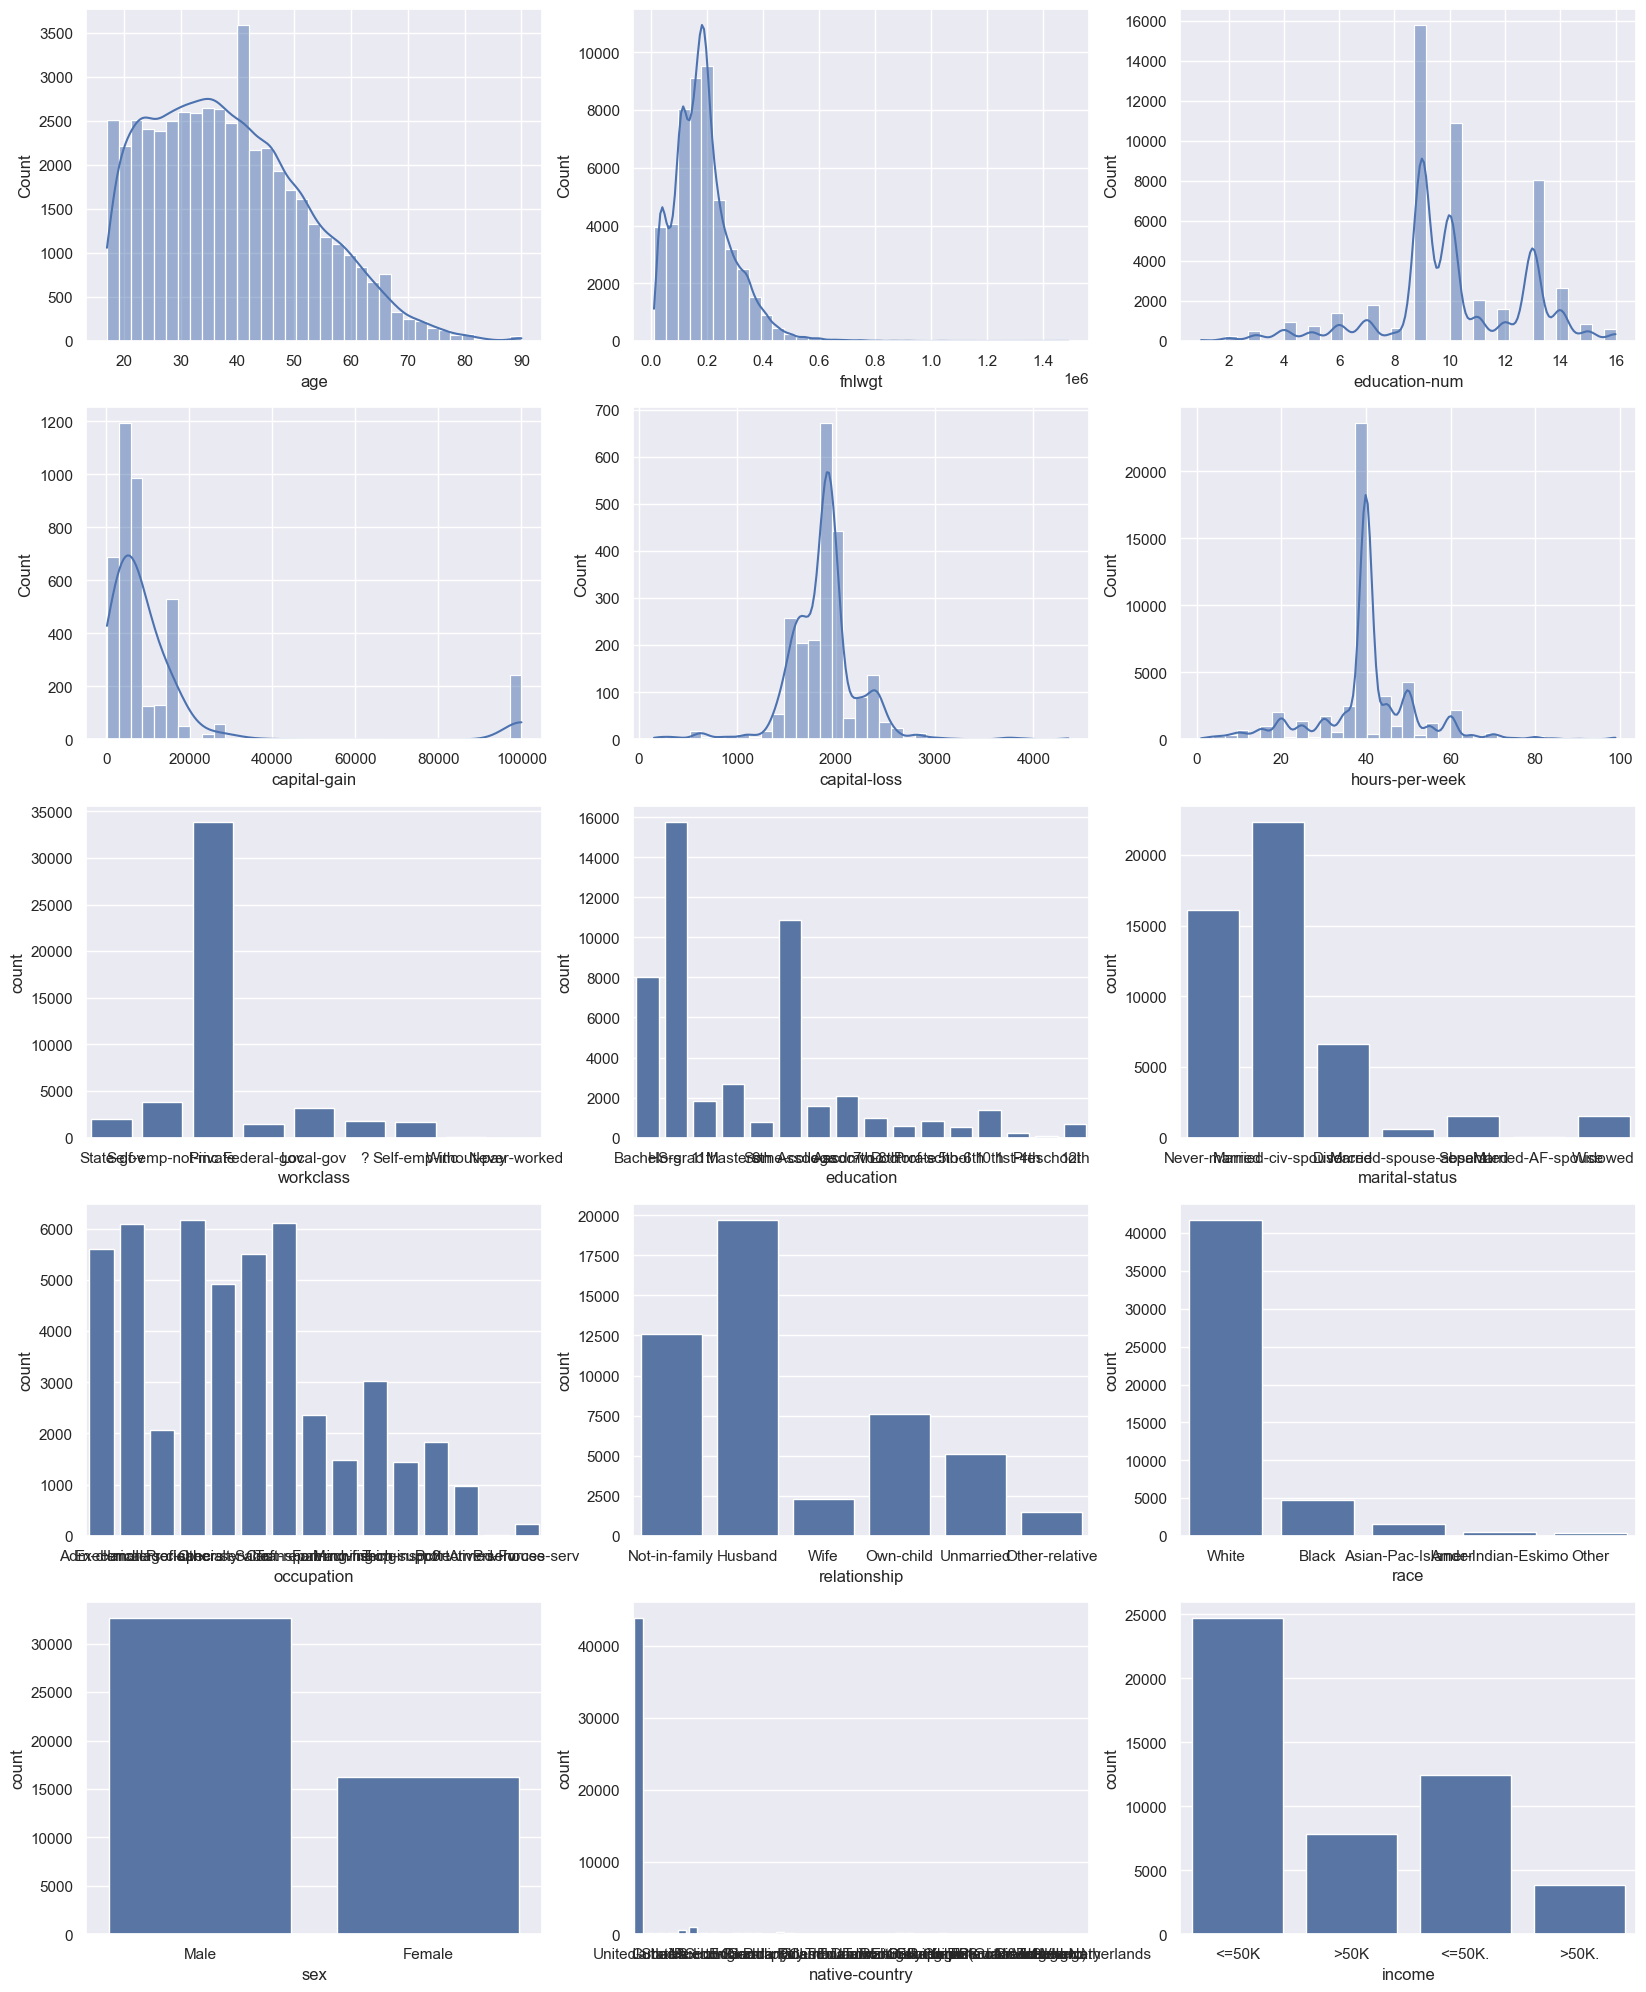

In [5]:
fig, axes = plt.subplots(5, 3, figsize=(20, 25))
sns.histplot(data=adult_data, x='age', kde=True, bins=35, ax=axes[0, 0])
sns.histplot(data=adult_data, x='fnlwgt', kde=True, bins=35, ax=axes[0, 1])
sns.histplot(data=adult_data, x='education-num', kde=True, bins=35, ax=axes[0, 2])
sns.histplot(data=adult_data[adult_data['capital-gain'] != 0], x='capital-gain', kde=True, bins=35, ax=axes[1, 0])
sns.histplot(data=adult_data[adult_data['capital-loss'] != 0], x='capital-loss', kde=True, bins=35, ax=axes[1, 1])
sns.histplot(data=adult_data, x='hours-per-week', kde=True, bins=35, ax=axes[1, 2])
sns.countplot(data=adult_data, x='workclass', ax=axes[2, 0])
sns.countplot(data=adult_data, x='education', ax=axes[2, 1])
sns.countplot(data=adult_data, x='marital-status', ax=axes[2, 2])
sns.countplot(data=adult_data, x='occupation', ax=axes[3, 0])
sns.countplot(data=adult_data, x='relationship', ax=axes[3, 1])
sns.countplot(data=adult_data, x='race', ax=axes[3, 2])
sns.countplot(data=adult_data, x='sex', ax=axes[4, 0])
sns.countplot(data=adult_data, x='native-country', ax=axes[4, 1])
sns.countplot(data=adult_data, x='income', ax=axes[4, 2])

plt.show()

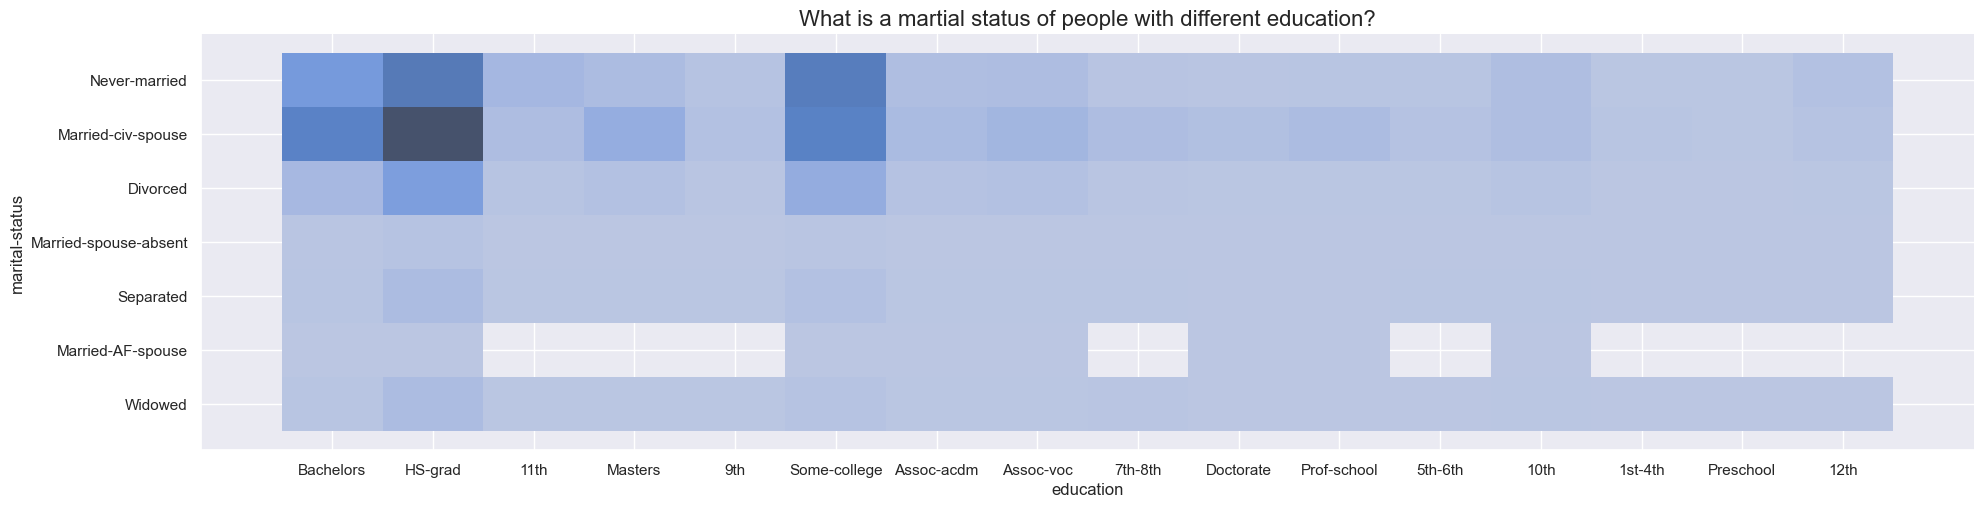

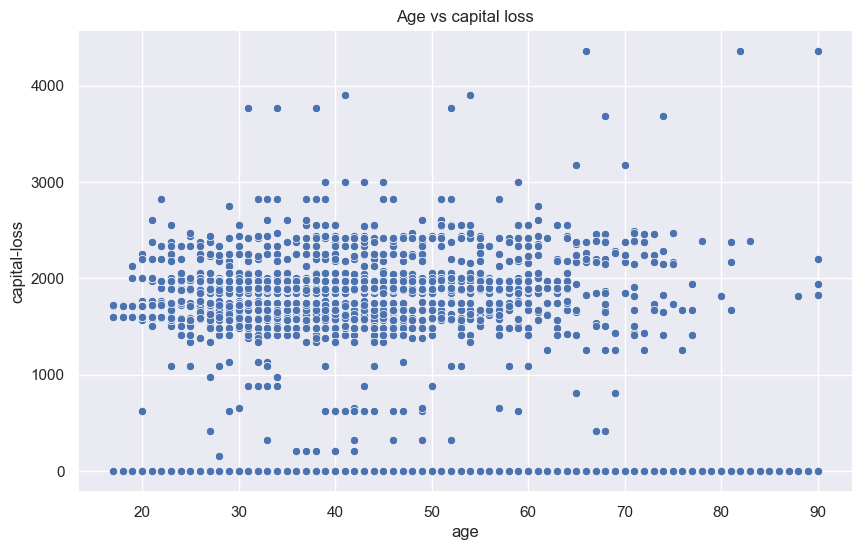

Correlation between capital loss and age is: 0.06


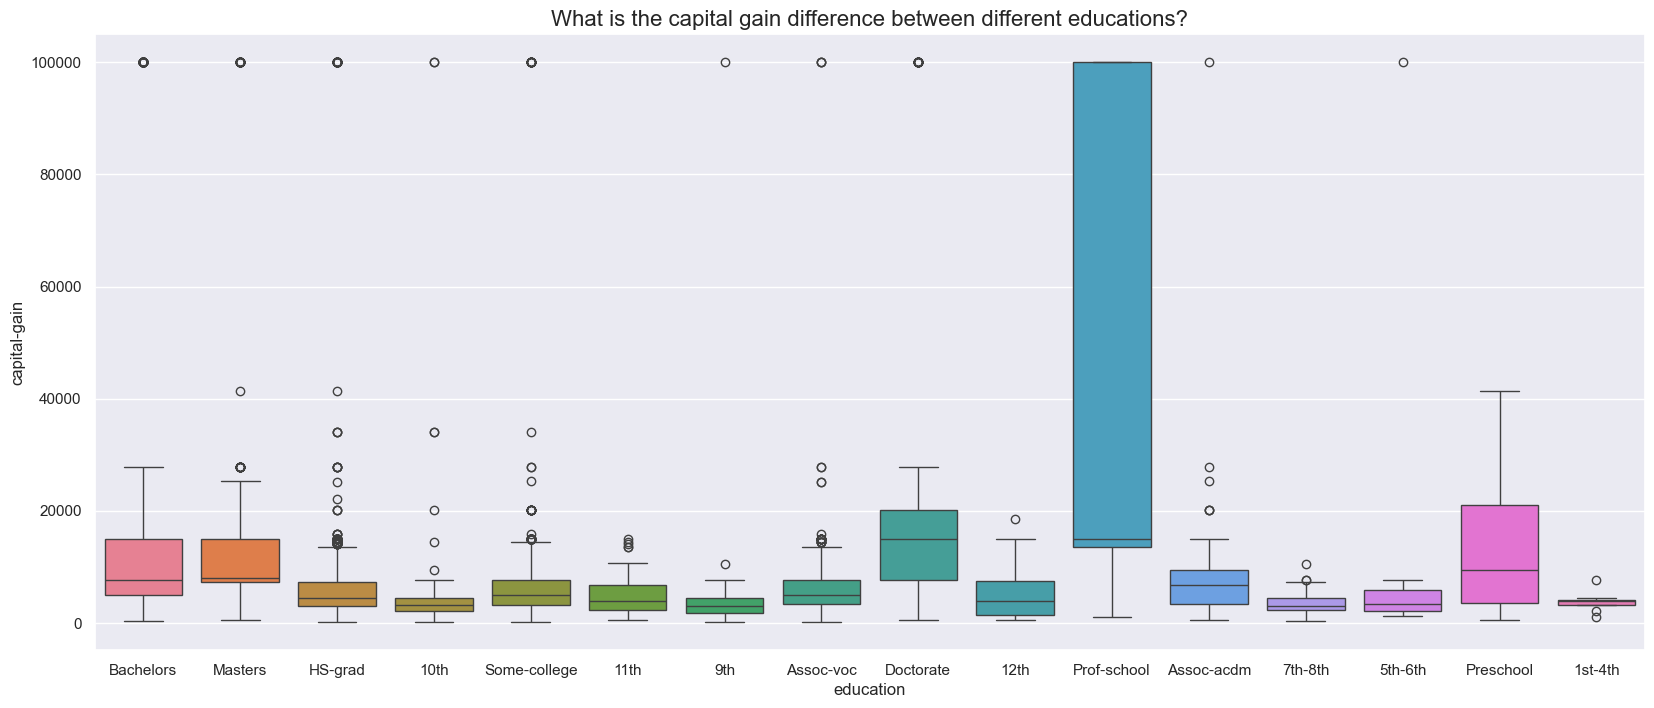

In [6]:
ax = sns.displot(data=adult_data, x='education', y='marital-status', aspect=4)
plt.title('What is a martial status of people with different education?', fontsize=16)
plt.show()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=adult_data, x='age', y='capital-loss')
plt.title('Age vs capital loss')
plt.show()
correlation_data = adult_data['age'].corr(adult_data['capital-loss'])
print(f'Correlation between capital loss and age is: {correlation_data:.2f}')

cleaned_data = adult_data[adult_data['capital-gain'] != 0]
sns.boxplot(data=cleaned_data, x='education', y='capital-gain', hue='education')
plt.title('What is the capital gain difference between different educations?', fontsize=16)
plt.show()